## Feature Pipeline for the `buoy_swells_huntington` feature group

### Requirements

 * pip install hopsworks

In [5]:
import os
import urllib.request  
import re
from itertools import chain
import pandas as pd
import numpy as np
import hopsworks
from datetime import datetime, timedelta
import sys

In [2]:
buoy="46253" # our bouy ID

In [3]:
def get_latest_url(today):
    pred_date = today.strftime("%Y%m%d")

    # There are 4 predictions per day at hours: "00", "06", "12", "18",
    h=int(today.strftime("%H"))
    found = False
    test_url = ""
    attempted_date = today

    while not found:
        pred_hour = "00"
        if h > 5:
            pred_hour = "06"
        if h > 11:
            pred_hour = "12" 
        if h > 17:
            pred_hour = "18"
        test_url = "https://ftpprd.ncep.noaa.gov/data/nccf/com/gfs/prod/gfs." \
        + attempted_date.strftime("%Y%m%d") + \
        "/" + pred_hour + "/wave/station/bulls.t" + pred_hour + "z/gfswave." + buoy + ".bull"
        try:
            print(test_url)
            urllib.request.urlopen(test_url)
            found = True
        except urllib.error.HTTPError as e: 
            # assume 404, URL not found. Try previous time.
            h = h - 6
            if h < 0:
                attempted_date = attempted_date - timedelta(days=1)
                # if i have to look back >1 day, then just exit with error - because upstream is prob broken
                if (today.day - attempted_date.day > 1):
                    sys.exit("ERROR: Could not download url: " + test_url) 
    print(test_url)
    return test_url, pred_hour

In [4]:
#today = datetime.now()
specific_date = datetime(2023, 12, 17)
now = datetime.now()
today = datetime(specific_date.year, specific_date.month, specific_date.day, now.hour, now.minute, now.second, now.microsecond)
print(today)
print(datetime.now())
#today = datetime.now()
url, pred_hour = get_latest_url(today)

2023-12-17 01:14:53.582577
2024-01-07 01:14:53.583673
https://ftpprd.ncep.noaa.gov/data/nccf/com/gfs/prod/gfs.20231217/00/wave/station/bulls.t00z/gfswave.46253.bull
https://ftpprd.ncep.noaa.gov/data/nccf/com/gfs/prod/gfs.20231216/00/wave/station/bulls.t00z/gfswave.46253.bull


AttributeError: 'tuple' object has no attribute 'tb_frame'

In [5]:
pred_hour

'06'

In [6]:
hours = 200 # number of sweel predictions we save
secondary_columns=[]
for i in range(1,hours):
    j=i*2
    secondary_columns.append("height" + str(j))
    secondary_columns.append("period" + str(j))
    secondary_columns.append("direction" + str(j))
    secondary_columns.append("hits_at" + str(j))

secondary_columns

['height2',
 'period2',
 'direction2',
 'hits_at2',
 'height4',
 'period4',
 'direction4',
 'hits_at4',
 'height6',
 'period6',
 'direction6',
 'hits_at6',
 'height8',
 'period8',
 'direction8',
 'hits_at8',
 'height10',
 'period10',
 'direction10',
 'hits_at10',
 'height12',
 'period12',
 'direction12',
 'hits_at12',
 'height14',
 'period14',
 'direction14',
 'hits_at14',
 'height16',
 'period16',
 'direction16',
 'hits_at16',
 'height18',
 'period18',
 'direction18',
 'hits_at18',
 'height20',
 'period20',
 'direction20',
 'hits_at20',
 'height22',
 'period22',
 'direction22',
 'hits_at22',
 'height24',
 'period24',
 'direction24',
 'hits_at24',
 'height26',
 'period26',
 'direction26',
 'hits_at26',
 'height28',
 'period28',
 'direction28',
 'hits_at28',
 'height30',
 'period30',
 'direction30',
 'hits_at30',
 'height32',
 'period32',
 'direction32',
 'hits_at32',
 'height34',
 'period34',
 'direction34',
 'hits_at34',
 'height36',
 'period36',
 'direction36',
 'hits_at36',
 'height

In [7]:
print(len(secondary_columns))

796


In [8]:
buoy="46253" # our bouy ID
def process_url(buoy_url):
    out = []
    for line in urllib.request.urlopen(buoy_url):
        l = line.decode('utf-8') #utf-8 or iso8859-1 or whatever the page encoding scheme is
        row=[]
        #print(l)
        if "Cycle" in l:
            regex = re.findall(r'Cycle.*:\s+([0-9]+)\s+([0-9]+)\s+UTC.*', l)
            if len(regex):
                thedate=regex[0]
        else:
            res = re.match(r'.*[|]\s+([0-9]+)\s+([0-9]+)\s+[|].*', l)
            #waves = re.findall(r'[|]\s+([0-9\.]+)\s+([0-9\.]+)\s+([0-9]+)\s+[|]', l)
            waves = re.findall(r'\s+([0-9\.]+)\s+([0-9\.]+)\s+([0-9]+)\s+', l)
            #print("waves", waves)
            if res is not None:
                row.append(thedate)
                row.append(res.groups())
            #print("Waves ",len(waves))
            if len(waves):
                if len(waves) > 3:
                    print("found > 3 waves, reduce to 3")
                    waves = waves[:3]
                b = []
                list(b.extend(item) for item in waves)
                row.append(b)
                my = tuple(chain.from_iterable(row))
                out.append(my)
    return out, thedate

In [9]:
out, thedate =process_url(url)
out


found > 3 waves, reduce to 3
found > 3 waves, reduce to 3
found > 3 waves, reduce to 3
found > 3 waves, reduce to 3
found > 3 waves, reduce to 3
found > 3 waves, reduce to 3
found > 3 waves, reduce to 3
found > 3 waves, reduce to 3
found > 3 waves, reduce to 3
found > 3 waves, reduce to 3
found > 3 waves, reduce to 3
found > 3 waves, reduce to 3
found > 3 waves, reduce to 3
found > 3 waves, reduce to 3
found > 3 waves, reduce to 3
found > 3 waves, reduce to 3
found > 3 waves, reduce to 3
found > 3 waves, reduce to 3
found > 3 waves, reduce to 3
found > 3 waves, reduce to 3
found > 3 waves, reduce to 3
found > 3 waves, reduce to 3
found > 3 waves, reduce to 3
found > 3 waves, reduce to 3
found > 3 waves, reduce to 3
found > 3 waves, reduce to 3
found > 3 waves, reduce to 3
found > 3 waves, reduce to 3
found > 3 waves, reduce to 3
found > 3 waves, reduce to 3
found > 3 waves, reduce to 3
found > 3 waves, reduce to 3


[('20240103',
  '6',
  '3',
  '6',
  '0.41',
  '10.2',
  '87',
  '0.41',
  '3.8',
  '86',
  '0.19',
  '12.0',
  '15'),
 ('20240103',
  '6',
  '3',
  '7',
  '0.41',
  '3.9',
  '86',
  '0.40',
  '10.1',
  '87',
  '0.17',
  '12.0',
  '14'),
 ('20240103',
  '6',
  '3',
  '8',
  '0.39',
  '4.0',
  '85',
  '0.39',
  '10.0',
  '87',
  '0.16',
  '15.3',
  '101'),
 ('20240103',
  '6',
  '3',
  '9',
  '0.38',
  '9.8',
  '87',
  '0.38',
  '4.0',
  '84',
  '0.16',
  '15.4',
  '101'),
 ('20240103',
  '6',
  '3',
  '10',
  '0.37',
  '4.0',
  '84',
  '0.37',
  '9.7',
  '88',
  '0.16',
  '15.6',
  '101'),
 ('20240103',
  '6',
  '3',
  '11',
  '0.35',
  '9.6',
  '88',
  '0.35',
  '4.0',
  '83',
  '0.17',
  '15.8',
  '101'),
 ('20240103',
  '6',
  '3',
  '12',
  '0.34',
  '9.5',
  '88',
  '0.34',
  '4.0',
  '81',
  '0.18',
  '15.8',
  '100'),
 ('20240103',
  '6',
  '3',
  '13',
  '0.35',
  '4.0',
  '74',
  '0.33',
  '9.5',
  '88',
  '0.19',
  '15.7',
  '100'),
 ('20240103',
  '6',
  '3',
  '14',
  '0.44

In [10]:
pd.DataFrame(out)[:20]

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,20240103,6,3,6,0.41,10.2,87,0.41,3.8,86,0.19,12.0,15
1,20240103,6,3,7,0.41,3.9,86,0.40,10.1,87,0.17,12.0,14
2,20240103,6,3,8,0.39,4.0,85,0.39,10.0,87,0.16,15.3,101
3,20240103,6,3,9,0.38,9.8,87,0.38,4.0,84,0.16,15.4,101
4,20240103,6,3,10,0.37,4.0,84,0.37,9.7,88,0.16,15.6,101
5,20240103,6,3,11,0.35,9.6,88,0.35,4.0,83,0.17,15.8,101
6,20240103,6,3,12,0.34,9.5,88,0.34,4.0,81,0.18,15.8,100
7,20240103,6,3,13,0.35,4.0,74,0.33,9.5,88,0.19,15.7,100
8,20240103,6,3,14,0.44,2.6,65,0.32,9.5,87,0.20,15.5,101
9,20240103,6,3,15,0.78,3.6,86,0.22,15.5,100,None,None,None


In [11]:
primary_columns=['pred_dtime', 'hour', 'pred_day', 'pred_hour', 'height1', 'period1', 'direction1', 'height2', 
         'period2', 'direction2', 'height3', 'period3', 'direction3'] 

# changed angels to valid swell from around 10 - 65 degrees
def is_valid_swell_direction(direction):
    if int(direction) > 66 or int(direction) < 9:
        return False
    return True

def best_height(row):
    best_secondary=2
    # Check which is best secondary swell - swell 2 or swell 3?
    if row['direction3'] != None:
        if is_valid_swell_direction(row['direction3']):
            if is_valid_swell_direction(row['direction2']) == False :
                best_secondary=3    
    best_direction = "direction" + str(best_secondary)
    best=1
    # Check which is best of swell 1 and secondary swell ?
    if row[best_direction] != None and is_valid_swell_direction(row[best_direction]) == True:
        if is_valid_swell_direction(row['direction1']) == False:
            best=best_secondary
                
    height = row['height' + str(best)]
    period = row['period' + str(best)]
    direction = row['direction' + str(best)]
        
    return pd.Series([height, period, direction])

# feature engineering - estimate the time at which the swell arrives at Lahinch from buoy
def estimate_hits_at(row):
    # baseline estimate
    hits_at = row['pred_dtime'] + row['hour_offset'] + timedelta(hours=0.4) 
    return pd.Series([hits_at])
    

    
today = datetime.now()
url, pred_hour = get_latest_url(today)
print(url)
res,thedate=process_url(url)
df = pd.DataFrame(res, columns=primary_columns)
df['pred_dtime'] = pd.to_datetime(df['pred_dtime'], format='%Y%m%d')

# Generate the timedelta series (40 minutes for each row)
time_offsets = pd.Series([timedelta(minutes=40) * i for i in range(len(df))])

# Create the cumulative sum of time offsets
#cumulative_time_offsets = time_offsets.cumsum()

#df.insert(loc=0, column="hour_offset", value=(df.reset_index().index*0.4))
#df['hour_offset'] = df.hour_offset.astype('timedelta64[m]')
df['hour_offset'] = time_offsets
print("DF H: ",type(df.hour))
print("DF ",df['hour'])
df['hour'] = df['hour'].astype(int)  # Convert to integer

#df['pred_dtime'] = df['pred_dtime'] + df.hour.astype('timedelta64[h]')
df['pred_dtime'] = df['pred_dtime'] + pd.to_timedelta(df['hour'], unit='h')

df

https://ftpprd.ncep.noaa.gov/data/nccf/com/gfs/prod/gfs.20240103/06/wave/station/bulls.t06z/gfswave.46253.bull
https://ftpprd.ncep.noaa.gov/data/nccf/com/gfs/prod/gfs.20240103/06/wave/station/bulls.t06z/gfswave.46253.bull
found > 3 waves, reduce to 3
found > 3 waves, reduce to 3
found > 3 waves, reduce to 3
found > 3 waves, reduce to 3
found > 3 waves, reduce to 3
found > 3 waves, reduce to 3
found > 3 waves, reduce to 3
found > 3 waves, reduce to 3
found > 3 waves, reduce to 3
found > 3 waves, reduce to 3
found > 3 waves, reduce to 3
found > 3 waves, reduce to 3
found > 3 waves, reduce to 3
found > 3 waves, reduce to 3
found > 3 waves, reduce to 3
found > 3 waves, reduce to 3
found > 3 waves, reduce to 3
found > 3 waves, reduce to 3
found > 3 waves, reduce to 3
found > 3 waves, reduce to 3
found > 3 waves, reduce to 3
found > 3 waves, reduce to 3
found > 3 waves, reduce to 3
found > 3 waves, reduce to 3
found > 3 waves, reduce to 3
found > 3 waves, reduce to 3
found > 3 waves, reduce 

,pred_dtime,hour,pred_day,pred_hour,height1,period1,direction1,height2,period2,direction2,height3,period3,direction3,hour_offset
0,2024-01-03 06:00:00,6,3,6,0.41,10.2,87,0.41,3.8,86,0.19,12.0,15,0 days 00:00:00
1,2024-01-03 06:00:00,6,3,7,0.41,3.9,86,0.40,10.1,87,0.17,12.0,14,0 days 00:40:00
2,2024-01-03 06:00:00,6,3,8,0.39,4.0,85,0.39,10.0,87,0.16,15.3,101,0 days 01:20:00
3,2024-01-03 06:00:00,6,3,9,0.38,9.8,87,0.38,4.0,84,0.16,15.4,101,0 days 02:00:00
4,2024-01-03 06:00:00,6,3,10,0.37,4.0,84,0.37,9.7,88,0.16,15.6,101,0 days 02:40:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380,2024-01-03 06:00:00,6,19,2,2.92,8.3,33,None,None,None,None,None,None,10 days 13:20:00
381,2024-01-03 06:00:00,6,19,3,2.85,8.3,37,None,None,None,None,None,None,10 days 14:00:00
382,2024-01-03 06:00:00,6,19,4,2.74,10.4,40,None,None,None,None,None,None,10 days 14:40:00
383,2024-01-03 06:00:00,6,19,5,2.60,10.5,44,0.16,15.5,17,None,None,None,10 days 15:20:00


In [12]:
df[['height','period','direction']]=df.apply(best_height, axis=1)
df[['hits_at']]=df.apply(estimate_hits_at, axis=1)
df['beach_id'] = 1
df.drop(['height1', 'period1', 'direction1', 'height2', 'period2', 'direction2', 'hour_offset',
          'height3', 'period3', 'direction3','hour', 'pred_day', 'pred_hour'], axis=1, inplace=True) 
df

,pred_dtime,height,period,direction,hits_at,beach_id
0,2024-01-03 06:00:00,0.19,12.0,15,2024-01-03 06:24:00,1
1,2024-01-03 06:00:00,0.17,12.0,14,2024-01-03 07:04:00,1
2,2024-01-03 06:00:00,0.39,4.0,85,2024-01-03 07:44:00,1
3,2024-01-03 06:00:00,0.38,9.8,87,2024-01-03 08:24:00,1
4,2024-01-03 06:00:00,0.37,4.0,84,2024-01-03 09:04:00,1
...,...,...,...,...,...,...
380,2024-01-03 06:00:00,2.92,8.3,33,2024-01-13 19:44:00,1
381,2024-01-03 06:00:00,2.85,8.3,37,2024-01-13 20:24:00,1
382,2024-01-03 06:00:00,2.74,10.4,40,2024-01-13 21:04:00,1
383,2024-01-03 06:00:00,2.60,10.5,44,2024-01-13 21:44:00,1


## Connect to your Hopsworks cluster 

In [6]:
project = hopsworks.login()
fs = project.get_feature_store()

Connected. Call `.close()` to terminate connection gracefully.



Multiple projects found. 

	 (1) SMDL_A01
	 (2) kompot

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/194711
Connected. Call `.close()` to terminate connection gracefully.


In [7]:
version = 1
swells_fg = fs.get_or_create_feature_group(name="buoy_swells_huntington",
                version=version,
                primary_key=["beach_id"],
                event_time="hits_at",
                description="Buoy surf height predictions",
                online_enabled=True,
                statistics_config={"enabled": True, "histograms": True, "correlations": True}
                )
#swells_fg.insert(df)


In [14]:
import numpy as np
from sklearn.linear_model import LinearRegression
class LinReg(LinearRegression):

    encoding = {'Poor':0.0,
                'Poor To Fair':1.0,
                'Fair':2.0,
                'Fair To Good':3.0}

    def __init__(self):
        super().__init__()

    def fit(self , X, y, sample_weight = None):
        y = self.encode(y)
        return super().fit(X, y, sample_weight)

    def predict_labels(self, X):
        y =  np.round(super().predict(X))
        return self.decode(y)
    
    def score(self, X, y, sample_weight = None):
        y = self.encode(y)
        return super().score(X, y, sample_weight)
    
    def encode(self,arr):
        arr = arr.copy()
        try:
            arr = arr.values
        except AttributeError:
            pass
        
        for key,val in self.encoding.items():
            arr[arr==key] = val
        arr = arr.astype(int)
        return arr
    
    def decode(self,arr):
        arr = arr.copy()
        arr = arr.astype(str).reshape(-1)
        for key,val in self.encoding.items():
            arr[arr==str(val)] = key
        return arr

In [8]:
df = swells_fg.read()
df.head()

Finished: Reading data from Hopsworks, using ArrowFlight (1.20s) 


,pred_dtime,height,period,direction,hits_at,beach_id
0,2024-01-03 00:00:00+00:00,0.19,12.1,15,2024-01-03 03:44:00+00:00,1
1,2023-12-29 00:00:00+00:00,0.90,15.3,88,2023-12-29 15:04:00+00:00,1
2,2023-12-29 00:00:00+00:00,0.78,14.7,88,2023-12-29 19:04:00+00:00,1
3,2024-01-05 00:00:00+00:00,0.46,3.0,68,2024-01-05 17:04:00+00:00,1
4,2023-12-29 00:00:00+00:00,1.06,15.7,89,2023-12-29 11:04:00+00:00,1


In [20]:
import joblib

data = df.sort_values(by='hits_at',ascending=False).head(1)[['height','period','direction','pred_dtime']]

time = data['pred_dtime'] + timedelta(minutes=24)
X = data.drop(['pred_dtime'],axis=1).values
mr = project.get_model_registry()
model = mr.get_model('wave_reg',version=1)
model_dir = model.download()
model = joblib.load(model_dir + "/wave_reg.pkl")

y_pred = model.predict_labels(X)

Connected. Call `.close()` to terminate connection gracefully.


In [28]:
time = time.values[0]

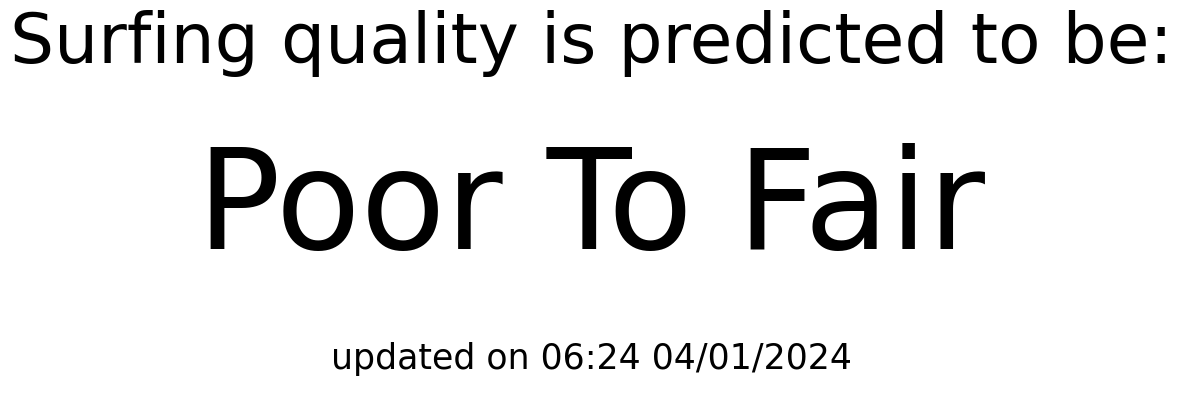

In [39]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots()
ax.text(0.5,0.9,'Surfing quality is predicted to be:',fontsize=50,ha='center')
ax.text(0.5,0.5,y_pred[0],fontsize=100,va='center', ha='center')
ax.text(0.5,0.1,'updated on '+pd.to_datetime(str(time)).strftime('%H:%M %d/%m/%Y'),fontsize=25,va='center', ha='center')
ax.tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)
for spine in ax.spines.values():
    spine.set_visible(False)
fig.savefig('prediction')

In [40]:
dataset_api = project.get_dataset_api()
dataset_api.upload("./prediction.png", "Resources/images", overwrite=True)

Uploading: 0.000%|          | 0/33765 elapsed<00:00 remaining<?

'Resources/images/prediction.png'

## Beach data

In [101]:
df = pd.read_csv('data/huntington.csv')
df = df.drop(['Unnamed: 0'],axis=1)
df.head()

,Current Weather,Surf Height,Surf Period,Surf Direction,Surf Quality,Water Temperature,Wind Direction,Wind Speed,Air Temperature,Sun Rise,Sun Set,High Tide,Low Tide,time
0,Clouds,3-4 FT - Waist to chest,11 seconds,South-Southwest,Fair,62 - 62 ° F,South-Southwest,9.22 MPH,67 ° F,06:52 AM,04:47 PM,03:07 AM 4.4' / 02:15 PM 3.94',09:02 AM: 2.26' / 09:04 PM: 0.56',December 19 at 12:30 PM
1,Clouds,3-4 FT - Waist to chest,17 seconds,South-Southwest,Poor To Fair,62 - 62 ° F,South,10.36 MPH,66 ° F,06:53 AM,04:48 PM,03:54 AM 4.82' / 03:52 PM 3.54',10:31 AM: 1.57' / 09:57 PM: 0.98',December 20 at 12:30 PM
2,Clouds,3-4 FT - Waist to chest,17 seconds,South-Southwest,Poor To Fair,62 - 62 ° F,South,10.36 MPH,66 ° F,06:53 AM,04:48 PM,03:54 AM 4.82' / 03:52 PM 3.54',10:31 AM: 1.57' / 09:57 PM: 0.98',December 20 at 12:30 PM
3,Clouds,3-5 FT - Waist to head,13 seconds,West-Southwest,Poor To Fair,62 - 62 ° F,South-Southeast,11.5 MPH,67 ° F,06:53 AM,04:48 PM,04:37 AM 5.28' / 05:21 PM 3.41',11:39 AM: 0.79' / 10:47 PM: 1.41',December 21 at 12:30 PM
4,Clouds,3-5 FT - Waist to head,13 seconds,West-Southwest,Poor To Fair,62 - 62 ° F,South-Southeast,11.5 MPH,67 ° F,06:53 AM,04:48 PM,04:37 AM 5.28' / 05:21 PM 3.41',11:39 AM: 0.79' / 10:47 PM: 1.41',December 21 at 12:30 PM


In [102]:
from pytz import timezone    

los_angeles = timezone('America/Los_Angeles')
sa_time = datetime.datetime.now(los_angeles)
print (sa_time.year)

2024


In [103]:
import datetime

def reformat_time(time:str,year:int):
    time_list = time.split()
    hour, minute = map(int,time_list[3].split(":"))
    day = int(time_list[1])
    month = datetime.datetime.strptime(time_list[0],'%B').month
    if time_list[4] == 'PM' and hour != 12:
        hour +=12
    if time_list[4] == 'AM' and hour == 12:
        hour = 0

    ## temp
    if month == 1:
        year+=1

    return datetime.datetime(year=year,month=month,day=day,hour=hour,minute=minute)

In [104]:
def reformat_time_2023(time:str):
    return reformat_time(time,year=2023)
df['datetime'] = df['time'].apply(reformat_time_2023)

In [105]:
df = df.drop_duplicates(subset=['datetime'])

In [106]:
df['Surf Quality'].value_counts()

Surf Quality
Fair            14
Poor To Fair    10
Poor             4
Name: count, dtype: int64

In [107]:
# df.loc[df['Surf Quality']=='Poor','Surf Quality'] = 0
# df.loc[df['Surf Quality']=='Poor To Fair','Surf Quality'] = 1
# df.loc[df['Surf Quality']=='Fair','Surf Quality'] = 2

In [108]:
df['quality'] = df['Surf Quality']
df = df[['quality','datetime']]
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['hour'] = df['datetime'].dt.hour
df['minute'] = df['datetime'].dt.minute
df.head()

,quality,datetime,year,month,day,hour,minute
0,Fair,2023-12-19 12:30:00,2023,12,19,12,30
1,Poor To Fair,2023-12-20 12:30:00,2023,12,20,12,30
3,Poor To Fair,2023-12-21 12:30:00,2023,12,21,12,30
5,Poor,2023-12-22 07:00:00,2023,12,22,7,0
6,Poor,2023-12-22 08:00:00,2023,12,22,8,0


In [109]:
version = 1
beach_fg = fs.get_or_create_feature_group(name="beach_swells_huntington",
                version=version,
                primary_key=['year', 'month', 'day', 'hour', 'minute'],
                event_time="datetime",
                description="Surf quality at the Huntington beach",
                online_enabled=True,
                statistics_config={"enabled": True, "histograms": True, "correlations": True}
                )
beach_fg.insert(df)

Feature Group created successfully, explore it at 
https://c.app.hopsworks.ai:443/p/194711/fs/194630/fg/384331


Uploading Dataframe: 0.00% |          | Rows 0/28 | Elapsed Time: 00:00 | Remaining Time: ?

Launching job: beach_swells_huntington_1_offline_fg_materialization
Job started successfully, you can follow the progress at 
https://c.app.hopsworks.ai/p/194711/jobs/named/beach_swells_huntington_1_offline_fg_materialization/executions


(<hsfs.core.job.Job at 0x17be0b880>, None)